# Current Population Survey Decision Tree Regression

Using Decision Tree Regression to predict each of the numerical variables in the dataset. In this example I am finding the optimal depth by scoring the model at increasing depths then using the optimal depth for plotting.

In [1]:
import numpy as np
import pandas as pd
from collections import OrderedDict
from sklearn.model_selection import train_test_split, cross_val_score, KFold

from sklearn.metrics import mean_squared_error, r2_score

from sklearn import ensemble
from sklearn import tree

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import dataset
# We only need numerical values for regression
data = pd.read_csv("../datasets/CPS2016_UPDATE.csv", 
                  usecols=['age', 'weekly_hrs', 'educ', 
                'fam_income', 'num_in_house', 'num_child']).astype(float)

# We are going to use the entire dataset for this model
# to test on a smaller sample uncomment below
# data = data.sample(n=1000)

# Apply 80/20 training/testing split
# Results may vary each time the data is split
data_train, data_test = train_test_split(data, test_size=0.2)
data.head()

,age,weekly_hrs,educ,fam_income,num_in_house,num_child
0,28.0,40.0,11.0,11.0,6.0,4.0
1,44.0,50.0,13.0,16.0,5.0,2.0
2,23.0,20.0,9.0,14.0,3.0,0.0
3,20.0,20.0,7.0,9.0,5.0,0.0
4,20.0,20.0,9.0,13.0,4.0,0.0


In [3]:
# function to return necessary information about model
def scoreDecisionTreeRegressor(x, y, xTest, yTest, maxDepth):
    # add max depth and iterate 
    reg = tree.DecisionTreeRegressor(max_depth=maxDepth)
    reg.fit(x,y)

    preds = reg.predict(xTest)
    print("R2 score : %.2f" % r2_score(yTest,preds))
    print("Mean squared error: %.2f" % mean_squared_error(yTest,preds))

    er = []
    g = 0
    for i in range(len(yTest)):
        x = (yTest[i] - preds[i]) **2
        er.append(x)
        g = g + x
    
    x = 0
    for i in range(len(er)):
       x = x + er[i]

    print ("MSE", x / len(er))

    v = np.var(er)
    print ("variance", v)

    print ("average of errors ", np.mean(er))

    m = np.mean(yTest)
    print ("average of observed values", m)

    y = 0
    for i in range(len(yTest)):
        y = y + ((yTest[i] - m) ** 2)

    print ("total sum of squares", y)
    print ("ẗotal sum of residuals ", g)
    print ("r2 calculated", 1 - (g / y)) 
    
# function to plot predictions vs training data    
def plotPredictions(data_train, data_test, prediction, target):
    fig, ax = plt.subplots(1,5, figsize=(15,3), dpi=100)
    loopData = data_train.drop(target, axis=1)
    for i, var in enumerate(loopData):
        ax[i].scatter(data_train[var], data_train[target], color='pink', marker='x', label='train')
        ax[i].scatter(data_test[var], data_test[target], color='red', marker='*', label='test', alpha=.2)
        ax[i].scatter(data_test[var], prediction, color='purple', marker='.', label='predicted', alpha=.9)
        ax[i].set_xlabel(var)
        ax[i].set_ylabel(target)
    
    # Remove duplicate labels    
    handles, labels = fig.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))    
    fig.legend(by_label.values(), by_label.keys())
    plt.show()     

# function to score model at increasing tree depths    
def getDecisionTreeCVScores(X, Y):
    nb = np.arange(1,15)
    scorelist = []
    for d in nb:
        T = tree.DecisionTreeRegressor(max_depth=d)
        scores = cross_val_score(T, X, Y,
                                 cv=KFold(shuffle=True, n_splits=5), n_jobs=-1)
        scorelist.append(scores.mean())
        print(f"{d}:\t{scores.mean()}")
        
    depth = scorelist.index(max(scorelist)) + 1
    print("max score: ", max(scorelist))
    print("tree-depth =", depth)

# Predict Number of Persons Living in Household

In [4]:
# Score with cross validation at increasing tree depths to find optimal depth
target = 'num_in_house'
getDecisionTreeCVScores(data.drop(target, axis=1), data[target])

1:	0.24006565471972027
2:	0.32539912804516835
3:	0.3915016943715779
4:	0.4055944735295875
5:	0.41572623186877744
6:	0.4262089412572
7:	0.43013817684409245
8:	0.430066480555773
9:	0.42979352195434267
10:	0.4157771488635548
11:	0.4061501857891187
12:	0.38548218139343315
13:	0.360176236269854
14:	0.31969481852811893
max score:  0.43013817684409245
tree-depth = 7


The R2 score is greatest at tree depth = 4

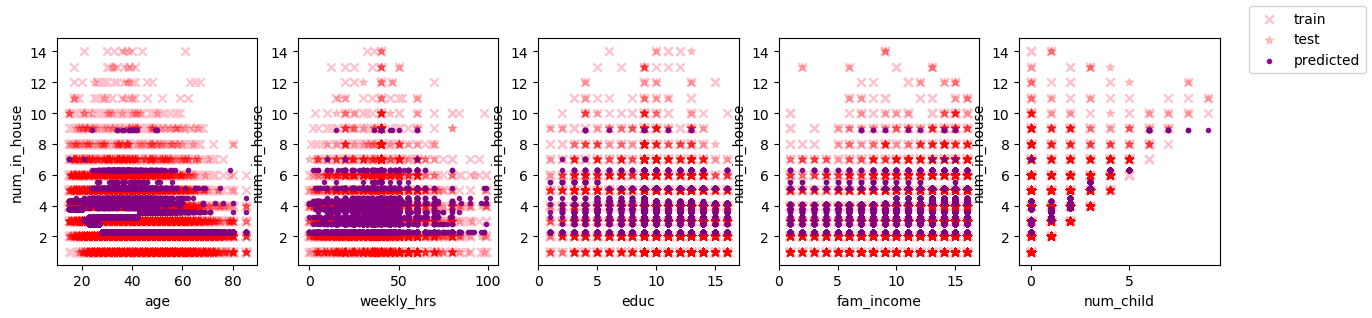

In [5]:
# Plot predictions at a tree depth of 4
T = tree.DecisionTreeRegressor(max_depth=4)
T.fit(data_train.drop(target, axis=1), data_train[target])
prediction = T.predict(data_test.drop(target, axis=1));
plotPredictions(data_train, data_test, prediction, target)    

In [6]:
# Score Model
xTest = np.array(data_test.drop(target, axis=1))
yTest = np.array(data_test[target])
                 
x = data_train.drop(target, axis=1)
y = data_train[target]

# Depth of 4
scoreDecisionTreeRegressor(x, y, xTest, yTest, 4)                

R2 score : 0.40
Mean squared error: 1.47
MSE 1.469694956938768
variance 19.893786467589155
average of errors  1.4696949569387165
average of observed values 3.0936566826531537
total sum of squares 27044.065333450184
ẗotal sum of residuals  16241.598969130326
r2 calculated 0.3994394419302979


Linear Regression and Decision Tree Regression have very similar R2 scores, while AdaBoost is producing lower scores around .222. The MSE and Variance are very close to Linear Regression results.

# Predict Number of own Children under 18 years of age

In [7]:
# Score with cross validation at increasing depths to find optimal depth
target = 'num_child'
getDecisionTreeCVScores(data.drop(target, axis=1), data[target]) 

1:	0.3108880052862669
2:	0.4488244056918823
3:	0.5193001875283292
4:	0.5672512022861363
5:	0.5781687948383875
6:	0.5896783160672685
7:	0.5989937829608183
8:	0.601552597641078
9:	0.5964228629637802
10:	0.5856034873640288
11:	0.5765504581371583
12:	0.5568959398839344
13:	0.538731516563608
14:	0.5041597210063499
max score:  0.601552597641078
tree-depth = 8


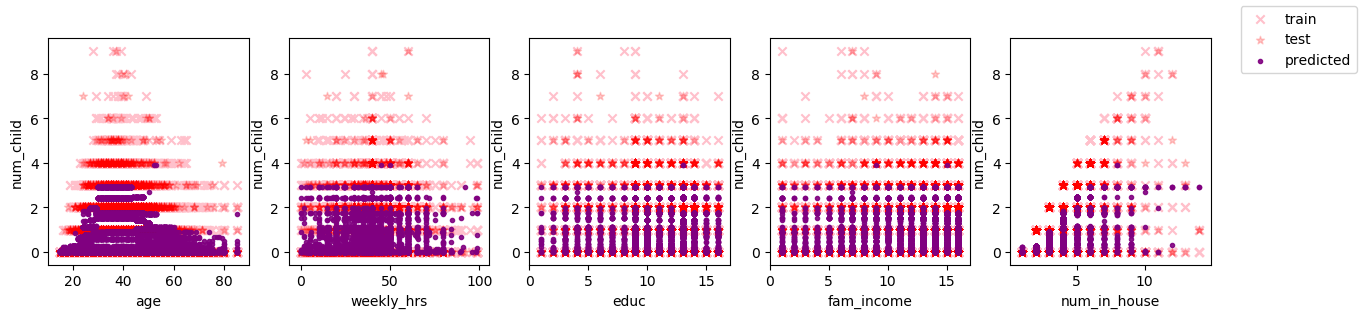

In [8]:
# Plot predictions at a tree depth of 7
T = tree.DecisionTreeRegressor(max_depth=7)
T.fit(data_train.drop(target, axis=1), data_train[target])
prediction = T.predict(data_test.drop(target, axis=1));
plotPredictions(data_train, data_test, prediction, target) 

In [9]:
# Score Model
xTest = np.array(data_test.drop(target, axis=1))
yTest = np.array(data_test[target])
                 
x = data_train.drop(target, axis=1)
y = data_train[target]

# Depth of 8
scoreDecisionTreeRegressor(x, y, xTest, yTest, 8) 

R2 score : 0.60
Mean squared error: 0.42
MSE 0.41710562431084497
variance 1.6623017039070433
average of errors  0.4171056243108438
average of observed values 0.6091756402135553
total sum of squares 11459.02959008322
ẗotal sum of residuals  4609.434254259148
r2 calculated 0.5977465440661567


Decision Tree Regression for predicting num_child produces the largest R2 score among other variables predicted using this dataset. The R2 score is larger than the other methods, and the MSE is the lowest. This may be a useful variable to predict on this dataset when using regression techiques.

# Predict Family Income (Numerical Value)
Family income is represented by integers 1 - 16, each representing increaseng income groups ranging from 'less than 5,000' to 'greater than 150,000'. Refer to dataset description for more information.

In [10]:
# Score with cross validation at increasing depths to find optimal depth
target = 'fam_income'
getDecisionTreeCVScores(data.drop(target, axis=1), data[target])   

1:	0.09893391312662832
2:	0.14401451576681196
3:	0.17074293894238174
4:	0.18789329166876195
5:	0.20500145961186145
6:	0.21878714274118677
7:	0.22420921091460003
8:	0.22901624296687845
9:	0.22674173709593992
10:	0.21993214443922032
11:	0.19730189481308807
12:	0.1767199411993453
13:	0.1605295812804691
14:	0.12187978450382073
max score:  0.22901624296687845
tree-depth = 8


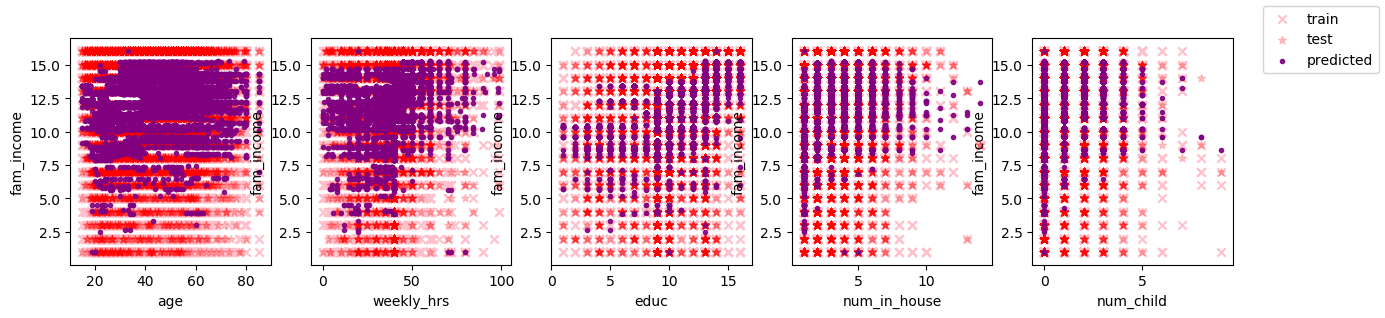

In [11]:
# Plot predictions at a tree depth of 8
T = tree.DecisionTreeRegressor(max_depth=8)
T.fit(data_train.drop(target, axis=1), data_train[target])
prediction = T.predict(data_test.drop(target, axis=1));
plotPredictions(data_train, data_test, prediction, target)   

In [12]:
# Score Model
xTest = np.array(data_test.drop(target, axis=1))
yTest = np.array(data_test[target])
                 
x = data_train.drop(target, axis=1)
y = data_train[target]

# Depth of 8
scoreDecisionTreeRegressor(x, y, xTest, yTest, 8)

R2 score : 0.23
Mean squared error: 9.30
MSE 9.304890809955886
variance 312.52537661520233
average of errors  9.30489080995597
average of observed values 12.23011492172654
total sum of squares 133129.8177540504
ẗotal sum of residuals  102828.3483408225
r2 calculated 0.22760843456728908


The R2 score is very low when predicting family income. The R2 score produced using Decision Tree Regression has a slightly larger R2 score than the other methods. The variance, and MSE are similar for each of the regression methods used.

# Predict Age

In [13]:
# Score with cross validation at increasing depths to find optimal depth
target = 'age'
getDecisionTreeCVScores(data.drop(target, axis=1), data[target])  

1:	0.07616322511850362
2:	0.10723814540034782
3:	0.1341410434416644
4:	0.1514137256950175
5:	0.16434111587644157
6:	0.17386172566012312
7:	0.17869343150127553
8:	0.18160311860865397
9:	0.17430875753627412
10:	0.1640925615362014
11:	0.15357204686743772
12:	0.13366401688366006
13:	0.10992944550740102
14:	0.08180772540750829
max score:  0.18160311860865397
tree-depth = 8


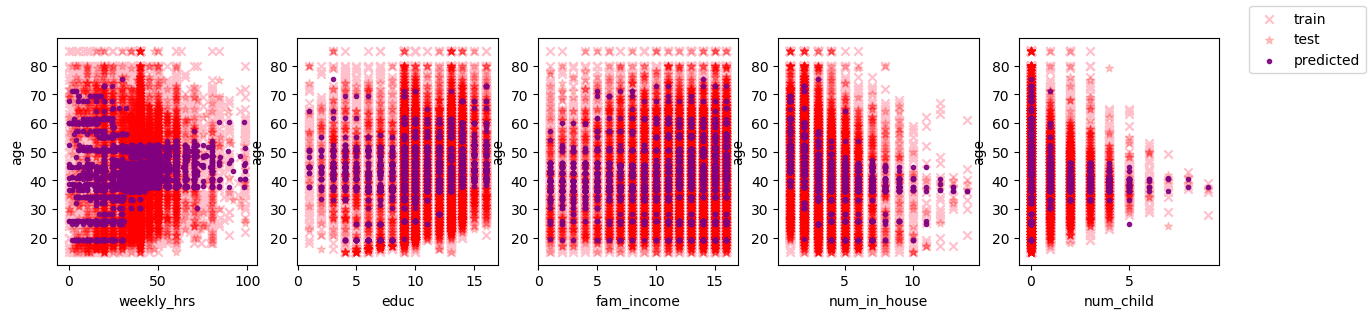

In [14]:
# Plot predictions at a tree depth of 7
T = tree.DecisionTreeRegressor(max_depth=7)
T.fit(data_train.drop(target, axis=1), data_train[target])
prediction = T.predict(data_test.drop(target, axis=1));
plotPredictions(data_train, data_test, prediction, target)   

In [15]:
# Score Model
xTest = np.array(data_test.drop(target, axis=1))
yTest = np.array(data_test[target])
                 
x = data_train.drop(target, axis=1)
y = data_train[target]

# Depth of 8
scoreDecisionTreeRegressor(x, y, xTest, yTest, 8)

R2 score : 0.17
Mean squared error: 175.19
MSE 175.1858909176131
variance 55735.90106753073
average of errors  175.18589091761217
average of observed values 42.67767622839562
total sum of squares 2323577.8827255606
ẗotal sum of residuals  1935979.2805305424
r2 calculated 0.16681110845329805


The R2 score is low for each method when predicting age.

# Predict Hours Worked Weekly

In [16]:
# Score with cross validation at increasing depths to find optimal depth
target = 'weekly_hrs'
getDecisionTreeCVScores(data.drop(target, axis=1), data[target])  

1:	0.054665638059142554
2:	0.08138057342539409
3:	0.09813352086064424
4:	0.10935967781369851
5:	0.1126640299772755
6:	0.11623639657453524
7:	0.11219410592882159
8:	0.10890678500722364
9:	0.09970713668531801
10:	0.08591558014805581
11:	0.07677944874454734
12:	0.04864332376440352
13:	0.029743272013994626
14:	-0.012784410671488588
max score:  0.11623639657453524
tree-depth = 6


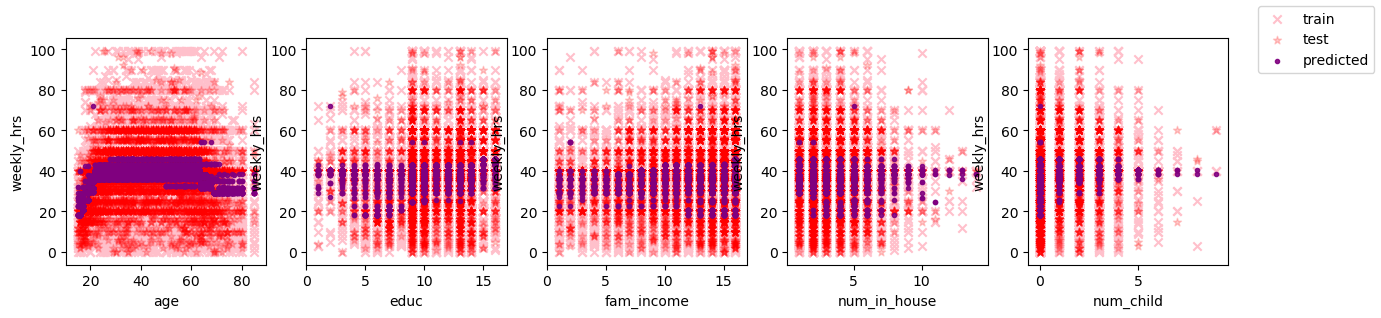

In [17]:
# Plot predictions at a tree depth of 6
T = tree.DecisionTreeRegressor(max_depth=6)
T.fit(data_train.drop(target, axis=1), data_train[target])
prediction = T.predict(data_test.drop(target, axis=1));
plotPredictions(data_train, data_test, prediction, target) 

In [18]:
# Score Model
xTest = np.array(data_test.drop(target, axis=1))
yTest = np.array(data_test[target])
                 
x = data_train.drop(target, axis=1)
y = data_train[target]

# Depth of 6
scoreDecisionTreeRegressor(x, y, xTest, yTest, 6)

R2 score : 0.12
Mean squared error: 102.54
MSE 102.54030452088598
variance 65379.66296712502
average of errors  102.54030452088725
average of observed values 39.188580218984704
total sum of squares 1294058.9988235824
ẗotal sum of residuals  1133172.905260311
r2 calculated 0.12432670667220858


The R2 score is low for each method when predicting weekly_hrs.

# Predict Education Level
Education level is represented by integers 31-46, each representing increaseng levels of education from 'less than first grade' to 'doctorates degree'. Refer to dataset description for more information.

In [19]:
# Score with cross validation at increasing depths to find optimal depth
target = 'educ'
getDecisionTreeCVScores(data.drop(target, axis=1), data[target])  

1:	0.10968056313883792
2:	0.1704104351274625
3:	0.21127795184435133
4:	0.22925665353202757
5:	0.2429844996112113
6:	0.24921841391047467
7:	0.2564259212159657
8:	0.2615544260315077
9:	0.2617898760286549
10:	0.2567652675785867
11:	0.24235458495989204
12:	0.22436520459806292
13:	0.20271933224310174
14:	0.16835836342856395
max score:  0.2617898760286549
tree-depth = 9


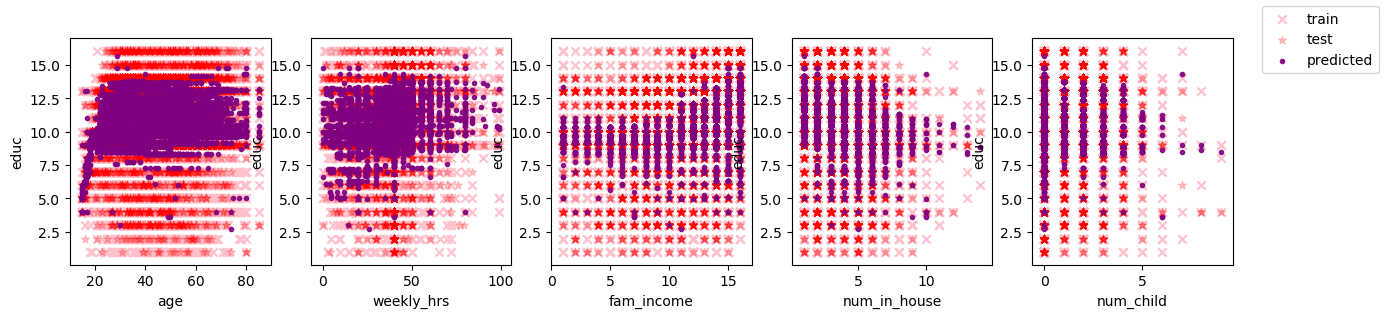

In [20]:
# Plot predictions at a tree depth of 9
T = tree.DecisionTreeRegressor(max_depth=9)
T.fit(data_train.drop(target, axis=1), data_train[target])
prediction = T.predict(data_test.drop(target, axis=1));
plotPredictions(data_train, data_test, prediction, target) 

In [21]:
# Score Model
xTest = np.array(data_test.drop(target, axis=1))
yTest = np.array(data_test[target])
                 
x = data_train.drop(target, axis=1)
y = data_train[target]

# Depth of 8
scoreDecisionTreeRegressor(x, y, xTest, yTest, 8)

R2 score : 0.26
Mean squared error: 4.90
MSE 4.904210717392577
variance 77.4804482369952
average of errors  4.904210717392613
average of observed values 10.778662564473803
total sum of squares 73512.60863270357
ẗotal sum of residuals  54196.432637905375
r2 calculated 0.26276004013555043


The R2 score is somewhat low for each method when predicting education, however Decision Tree Regression produces a significantly larger score.